In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [2]:
raw_data = load_iris(as_frame=True)

In [3]:
df = raw_data.data
df['labels'] = raw_data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [5]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
labels                 int32
dtype: object

In [6]:
STR_LABEL = tuple(raw_data.target_names)
print("Labels:", STR_LABEL)

Labels: ('setosa', 'versicolor', 'virginica')


In [7]:
df_copy = df.copy()

to_rename = {'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'}
df_copy.rename(columns=to_rename, inplace=True)

In [8]:
df_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


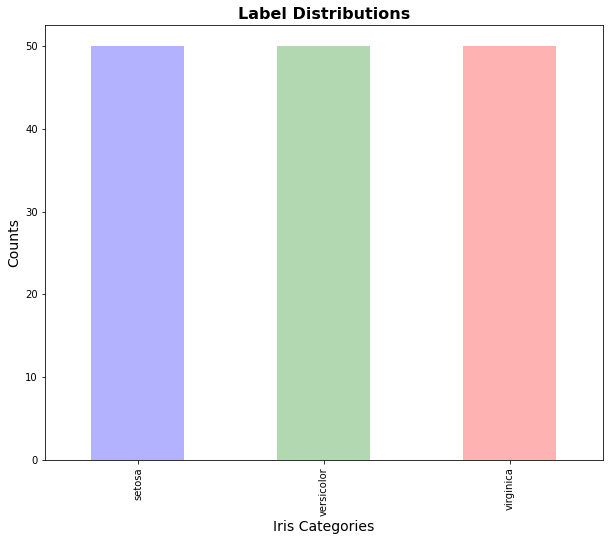

In [9]:
df_count_labels = df_copy[['labels']].value_counts()
df_count_labels.plot(kind='bar', color=['blue', 'green', 'red'], alpha=.3, figsize=(10,8))

plt.title('Label Distributions', fontsize=16, fontweight='bold')
plt.xlabel('Iris Categories', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(np.arange(3), STR_LABEL)

plt.show()

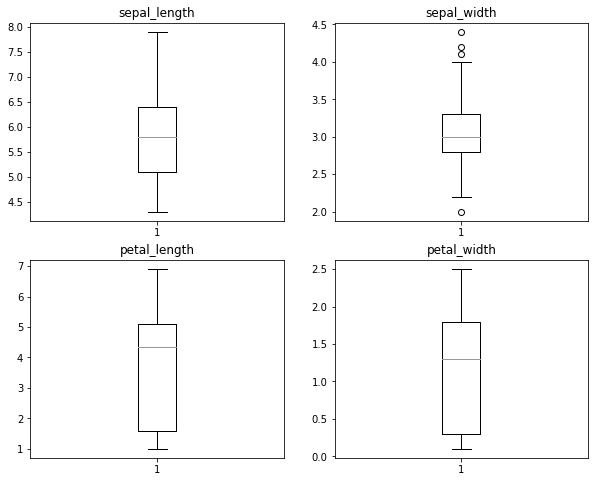

In [10]:
cols = df_copy.columns
fig, ax = plt.subplots(2, 2, figsize=(10,8))

for c, axi in zip(cols, ax.flatten()):
    if c == 'label':
        continue
        
    axi.boxplot(x=df_copy[c])
    axi.set_title(c)
    
plt.show()

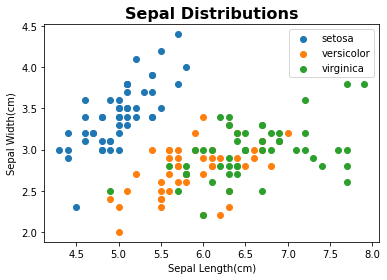

In [11]:
sepal_groups = df_copy[['sepal_length', 'sepal_width', 'labels']].groupby('labels')
for label, points in sepal_groups:
    plt.scatter(points['sepal_length'], points['sepal_width'], label=label, marker='o')

    
plt.legend(STR_LABEL)
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width(cm)')
plt.title('Sepal Distributions', fontsize=16, fontweight='bold')
plt.show()

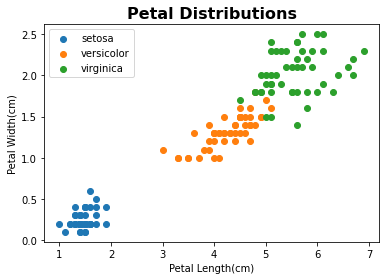

In [12]:
petal_groups = df_copy[['petal_length', 'petal_width', 'labels']].groupby('labels')
for label, points in petal_groups:
    plt.scatter(points['petal_length'], points['petal_width'], label=label, marker='o')

plt.legend(STR_LABEL)
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.title('Petal Distributions', fontsize=16, fontweight='bold')
plt.show()

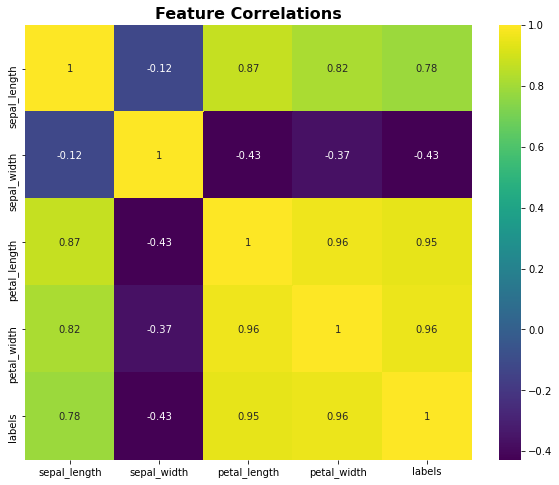

In [13]:
corr = df_copy.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='viridis', annot=True)

plt.title('Feature Correlations', fontsize=16, fontweight='bold')

plt.show()

In [14]:
from sklearn.neighbors import NearestNeighbors

nn_model = NearestNeighbors(n_neighbors=5)
nn_model.fit(raw_data.data)

NearestNeighbors()

In [15]:
test = np.array([5.4,2,2,2,3])
test = test.reshape(1,-1)
# print(test.shape)
nn_model.kneighbors(test, n_neighbors=5)

(array([[2.47991935, 2.63438797, 2.66458252, 2.72213152, 2.77488739]]),
 array([[98, 93, 57, 60, 79]], dtype=int64))

In [16]:
df.loc[[98, 93, 57, 60, 79]]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
98,5.1,2.5,3.0,1.1,1
93,5.0,2.3,3.3,1.0,1
57,4.9,2.4,3.3,1.0,1
60,5.0,2.0,3.5,1.0,1
79,5.7,2.6,3.5,1.0,1


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

linear_model = LinearRegression()

features = df_copy[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
labels = df_copy['labels']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=101)

In [18]:
linear_model.fit(x_train, y_train)
linear_preds = linear_model.predict(x_test)
print('Test Error:', mean_squared_error(y_test, linear_preds))

Test Error: 0.052254531519096835


In [19]:
print('Model intercept:', linear_model.intercept_)
print('Model Coefficient(s):', linear_model.coef_)

Model intercept: 0.29917243556059336
Model Coefficient(s): [-0.0757499  -0.10274909  0.16051166  0.70853457]


In [20]:
def plot_linear_reg(equation, x_range=range(4,8)):
    x = np.array(x_range)
    y = eval(equation)
    
    sns.lineplot(x, y)
    plt.show()

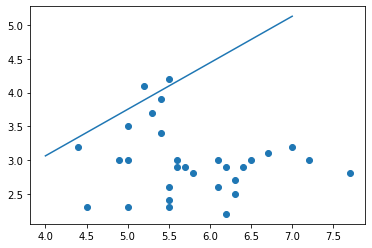

In [21]:
plt.scatter(x_test['sepal_length'], x_test['sepal_width'])
plot_linear_reg('-0.0757499*x + -0.10274909*x + 0.16051166*x + 0.70853457*x + 0.29917243556059336')

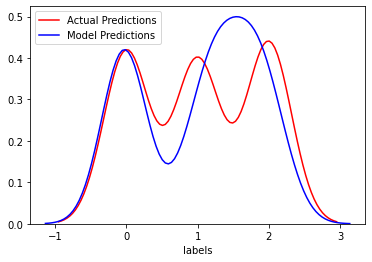

In [22]:
ax = sns.distplot(y_train, hist=False, color='r', label='Actual Predictions')
sns.distplot(linear_model.predict(x_train), hist=False, color='b', label='Model Predictions', ax=ax)

plt.show()

Model intercept: 301666323713.4761
Model Coefficient(s): [-3.01666324e+11  1.47303896e+00 -1.45106229e+00 -1.61876939e+00
  3.67263883e+00 -4.32698888e-01  4.87927381e-01  2.39928745e+00
 -7.35168511e+00  4.43117515e-01 -2.87099347e+00  8.75432592e+00
 -8.42325934e-01  3.94208672e+00 -1.42978831e+00 -6.91085018e-03
  1.59204449e-01 -2.81132221e-01  1.64058814e+00 -3.69295283e-01
  1.65337774e-01 -1.55062663e+00 -1.84076494e-01 -5.17743434e-01
 -8.17627732e-01  1.43659711e-01  2.63320512e-01 -5.75224576e-01
  4.61145117e-01 -1.12043099e+00  2.04688096e+00  3.23497547e-01
 -1.09266247e+00  2.37164682e+00 -1.45543328e+00]

Test Error: 0.25364502059916655


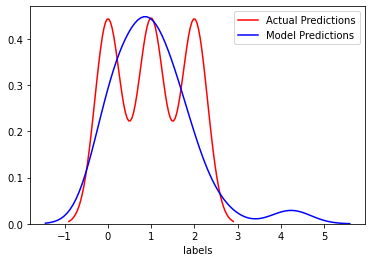

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=3)
x_train_poly, x_test_poly = poly_feat.fit_transform(x_train), poly_feat.fit_transform(x_test)

poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

print('Model intercept:', poly_model.intercept_)
print('Model Coefficient(s):', poly_model.coef_)

poly_preds = poly_model.predict(x_test_poly)
print('\nTest Error:', mean_squared_error(y_test, poly_preds))

ax1 = sns.distplot(df_copy['labels'], hist=False, color='r', label='Actual Predictions')
sns.distplot(poly_preds, hist=False, color='b', label='Model Predictions', ax=ax1)

plt.show()

In [25]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, max_iter=1000)
kmeans_model.fit(raw_data.data)
kmeans_preds = kmeans_model.predict(raw_data.data)

In [26]:
kmeans_model.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

In [27]:
kmeans_model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

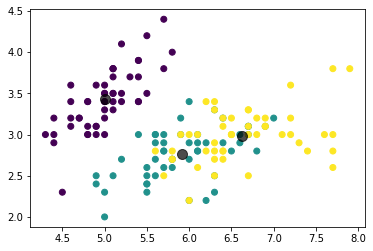

In [31]:
plt.scatter(raw_data.data['sepal length (cm)'], raw_data.data['sepal width (cm)'], c=kmeans_preds)
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=.7)

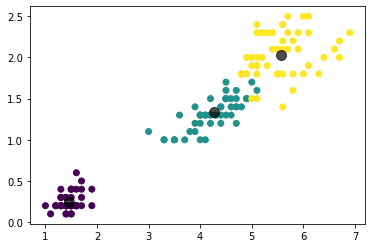

In [32]:
plt.scatter(raw_data.data['petal length (cm)'], raw_data.data['petal width (cm)'], c=kmeans_preds)
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:,2], centers[:,3], c='black', s=100, alpha=.7)

In [30]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model

PCA(n_components=2)

In [33]:
pca_model.fit(raw_data.data)

PCA(n_components=2)

In [34]:
pca_feat = pca_model.transform(raw_data.data)
pca_feat

array([[-2.86541481e+00,  2.96294592e-01],
       [-2.89204667e+00, -1.83785089e-01],
       [-3.05498018e+00, -1.74826556e-01],
       [-2.92022951e+00, -3.31581792e-01],
       [-2.90685193e+00,  2.95916920e-01],
       [-2.48985229e+00,  7.33821200e-01],
       [-2.99073479e+00, -1.23337756e-01],
       [-2.81072341e+00,  1.49253233e-01],
       [-3.05102452e+00, -5.96522880e-01],
       [-2.85367989e+00, -1.18129504e-01],
       [-2.70121731e+00,  6.30088258e-01],
       [-2.79746912e+00,  1.83420106e-03],
       [-2.95910703e+00, -2.45743109e-01],
       [-3.36629732e+00, -5.60864364e-01],
       [-2.83188903e+00,  1.14006491e+00],
       [-2.58993648e+00,  1.30218121e+00],
       [-2.81008938e+00,  7.72676709e-01],
       [-2.83175695e+00,  2.89400035e-01],
       [-2.41526804e+00,  8.78798583e-01],
       [-2.77580155e+00,  4.85110874e-01],
       [-2.51699488e+00,  4.05235787e-01],
       [-2.73410906e+00,  4.09741412e-01],
       [-3.36069900e+00,  5.93621201e-02],
       [-2.

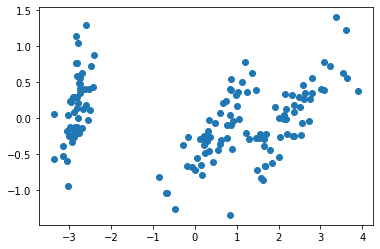

In [35]:
plt.scatter(pca_feat[:,0], pca_feat[:,1])

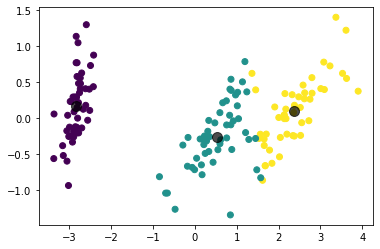

In [36]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(pca_feat)
kmeans_pca_preds = kmeans_model.predict(pca_feat)

centers = kmeans_model.cluster_centers_
plt.scatter(pca_feat[:,0], pca_feat[:,1], c=kmeans_pca_preds)
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=.7)

In [56]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris_data = load_iris()
tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(iris_data.data, iris_data.target)

DecisionTreeClassifier(criterion='entropy')

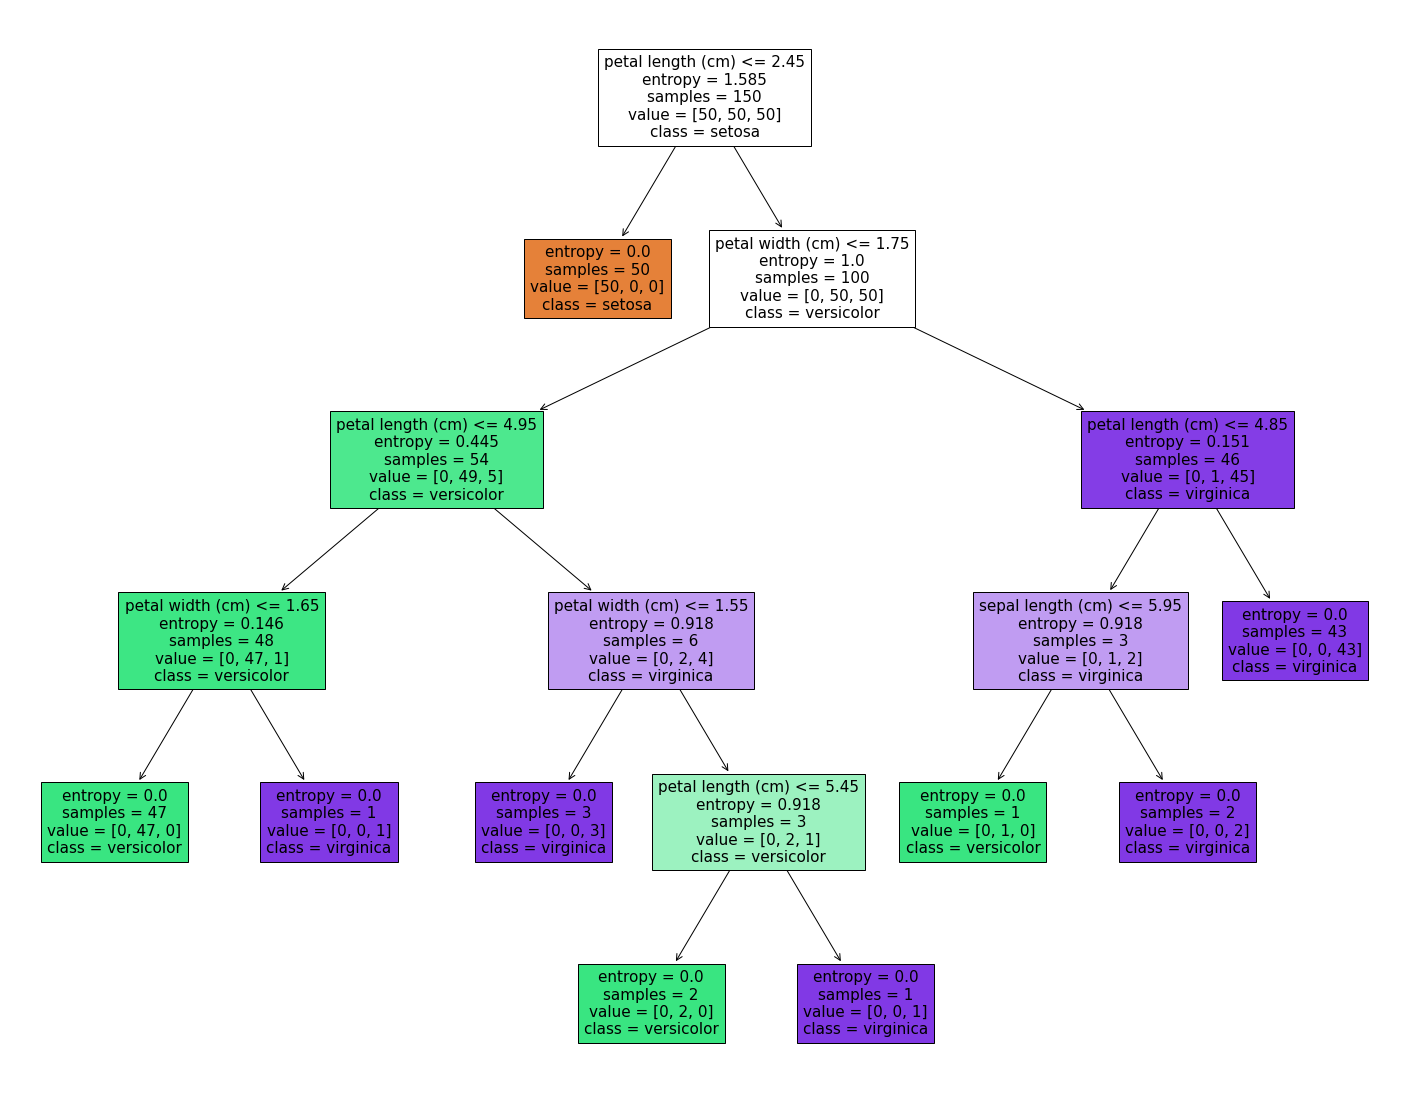

In [57]:
plt.figure(figsize=(25,20))
plot_tree(tree_model, feature_names=iris_data.feature_names, class_names=iris_data.target_names, filled=True)

plt.show()